24
24


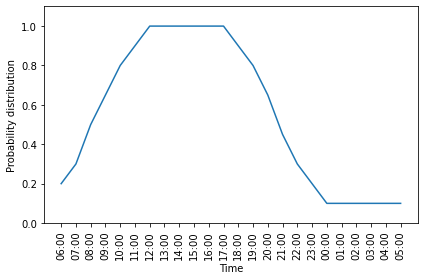

In [6]:
from model_lomba import *
import matplotlib.pyplot as plt
import seaborn as sns

demand = [0.2,0.3,0.5,0.65,0.8,0.9,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.8,0.65,0.45,0.3,0.2,0.1,0.1,0.1,0.1,0.1,0.1]
hour = ["06:00","07:00","08:00","09:00","10:00","11:00","12:00","13:00","14:00","15:00","16:00","17:00","18:00","19:00","20:00","21:00","22:00","23:00","00:00","01:00","02:00","03:00","04:00","05:00"]
print(len(demand))
print(len(hour))

plt.plot(hour,demand)
plt.xticks(rotation = 'vertical')
plt.xlabel('Time')
plt.ylabel('Probability distribution')
plt.title('')
plt.ylim([0.0,1.1])
#plt.tight_layout()
#plt.savefig('Prob-dist.png', format = 'png' )
plt.show()

In [146]:
map_width = 50
map_height = 50
moore = False
num_of_motorist = 50
inv_size = 8
cp_size = int(np.ceil(inv_size/8))
model = switching_model(num_of_motorist=50,num_of_stations=10,inv_size=inv_size,cp_size= cp_size,width=map_width,height=map_height,moore=moore, configuration="more", demand = demand)

#Dalam menit
days = 14
num_of_step = days*24*60
#num_of_step = 100
for i in range(num_of_step):
    model.step()

16
16


In [147]:
#Ambil data agent
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data.head()

Position       Charge Alive  Full_battery  Empty_battery  \
Step AgentID                                                            
0    0           None  1030.049322  None           NaN            NaN   
     1           None  1820.291432  None           NaN            NaN   
     2           None  1582.033593  None           NaN            NaN   
     3           None   445.728642  None           NaN            NaN   
     4           None   293.954001  None           NaN            NaN   

              CP_full  CP_empty  
Step AgentID                     
0    0            NaN       NaN  
     1            NaN       NaN  
     2            NaN       NaN  
     3            NaN       NaN  
     4            NaN       NaN

In [148]:
motorist_alive = agent_data.xs(num_of_step-1,level = "Step")["Alive"]
motorist_id = []
for motor in model.motorists:
    motorist_id.append(motor.unique_id)
motorist_alive[motorist_id]

AgentID
194    False
195     True
196     True
197    False
198     True
199    False
200    False
201    False
202     True
203     True
204     True
205     True
206     True
207     True
208     True
209     True
210     True
211    False
212     True
213    False
214     True
215     True
216    False
217     True
218    False
219     True
220    False
221     True
222    False
223     True
224     True
225    False
226     True
227     True
228     True
229     True
230    False
231     True
232     True
233     True
234     True
235    False
236    False
237     True
238     True
239    False
240    False
241    False
242     True
243    False
Name: Alive, dtype: object

In [149]:

agent_pos = agent_data.xs(0,level = "Step")["Position"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_pos = agent_pos[station_id]
print(station_pos)

AgentID
244      (5, 5)
245     (5, 17)
246     (5, 30)
247     (5, 42)
248     (17, 5)
249    (17, 17)
250    (17, 30)
251    (17, 42)
252     (30, 5)
253    (30, 17)
254    (30, 30)
255    (30, 42)
256     (42, 5)
257    (42, 17)
258    (42, 30)
259    (42, 42)
Name: Position, dtype: object


In [150]:
step_station = num_of_step-1
#step_station = 0
agent_full = agent_data.xs(step_station,level = "Step")["Full_battery"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_full = agent_full[station_id]
print(station_full)

AgentID
244    4.0
245    7.0
246    8.0
247    8.0
248    8.0
249    8.0
250    8.0
251    8.0
252    8.0
253    8.0
254    7.0
255    6.0
256    8.0
257    8.0
258    4.0
259    6.0
Name: Full_battery, dtype: float64


In [151]:
agent_empty = agent_data.xs(step_station,level = "Step")["Empty_battery"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_empty = agent_empty[station_id]
print(station_empty)

AgentID
244    4.0
245    1.0
246    0.0
247    0.0
248    0.0
249    0.0
250    0.0
251    0.0
252    0.0
253    0.0
254    1.0
255    2.0
256    0.0
257    0.0
258    4.0
259    2.0
Name: Empty_battery, dtype: float64


In [152]:
agent_cp_full = agent_data.xs(step_station,level = "Step")["CP_full"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_cp_full = agent_cp_full[station_id]
print(station_cp_full)

AgentID
244    0.0
245    0.0
246    1.0
247    0.0
248    1.0
249    1.0
250    1.0
251    1.0
252    0.0
253    0.0
254    0.0
255    0.0
256    0.0
257    0.0
258    0.0
259    0.0
Name: CP_full, dtype: float64


In [153]:
agent_cp_empty = agent_data.xs(step_station,level = "Step")["CP_empty"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_cp_empty = agent_cp_empty[station_id]
print(station_cp_empty)

AgentID
244    1.0
245    1.0
246    0.0
247    1.0
248    0.0
249    0.0
250    0.0
251    0.0
252    1.0
253    1.0
254    1.0
255    1.0
256    1.0
257    1.0
258    1.0
259    1.0
Name: CP_empty, dtype: float64


In [154]:
#Ambil data motorist
driver_num = 0
motorist_pos = agent_data.xs(model.motorists[driver_num].unique_id, level = "AgentID")["Position"]
motorist_pos.head()
motorist_pos.tail()

Step
20155    (30, 35)
20156    (30, 35)
20157    (30, 35)
20158    (30, 35)
20159    (30, 35)
Name: Position, dtype: object

Text(0, 0.5, 'y')

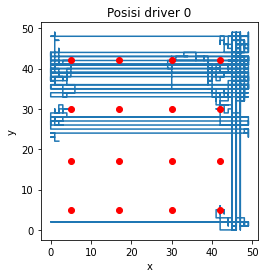

In [155]:
#Coba plot posisi
x_coor = []
y_coor = []
for coor in motorist_pos:
    x_coor.append(coor[0])
    y_coor.append(coor[1])



plt.plot(x_coor,y_coor)
for i in range(model.num_of_stations):
    plt.plot(model.stations[i].pos[0],model.stations[i].pos[1],color = "red", marker = 'o')
plt.xlim([0,map_width])
plt.ylim([0,map_height])
plt.title('Posisi driver ' + str(driver_num))
plt.axis('scaled')
plt.xlabel('x')
plt.ylabel('y')

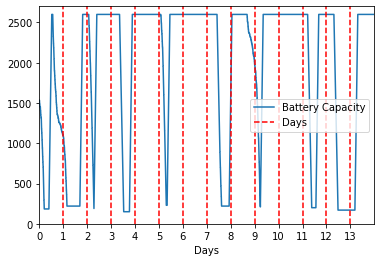

In [163]:
#Cek baterai
battery_id = 8
battery_energy = agent_data.xs(battery_id, level = "AgentID")["Charge"]
battery_energy.plot()
plt.xlim(0,num_of_step)
plt.ylim(0,2700)
for i in range(1,days):
    plt.axvline(x = 1440*i, color = 'r', linestyle='--', label = 'axvline - full height')
plt.legend(['Battery Capacity','Days'])
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, days*1440, step=1440))  # Set label locations.
plt.xticks(np.arange(days)*1440, np.arange(0,days))  # Set text labels.
#plt.xticks([0, 1, 2], ['January', 'February', 'March'],
#       rotation=20)  # Set text labels and properties.
plt.xlabel('Days')
#plt.title('Example of Battery Charge Cycle')
plt.show()

In [157]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data.tail()

,num_of_alive,num_of_charging
20155,31,11
20156,31,11
20157,31,11
20158,31,11
20159,31,11


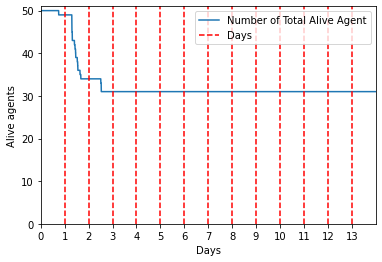

In [158]:
plt.plot(model_data["num_of_alive"])
plt.ylim([0,num_of_motorist + 1])
plt.ylabel("Alive agents")
plt.xlabel("Steps")
plt.xlim(0,num_of_step)
for i in range(1,days):
    plt.axvline(x = 1440*i, color = 'r', linestyle='--', label = 'axvline - full height')
plt.legend(['Number of Total Alive Agent','Days'])
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, days*1440, step=1440))  # Set label locations.
plt.xticks(np.arange(days)*1440, np.arange(0,days))  # Set text labels.
#plt.xticks([0, 1, 2], ['January', 'February', 'March'],
#       rotation=20)  # Set text labels and properties.
plt.xlabel('Days')
#plt.title('Number of Total Alive Agent')
plt.show()

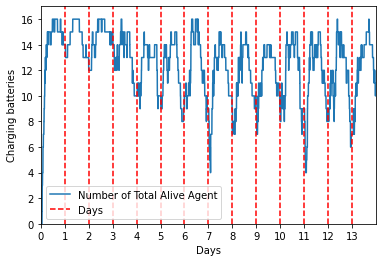

In [159]:
plt.plot(model_data["num_of_charging"])
plt.ylim([0,model.num_of_stations*model.cp_size +1])
plt.ylabel("Charging batteries")
plt.xlabel("Steps")
plt.xlim(0,num_of_step)
for i in range(1,days):
    plt.axvline(x = 1440*i, color = 'r', linestyle='--', label = 'axvline - full height')
plt.legend(['Number of Total Alive Agent','Days'])
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, days*1440, step=1440))  # Set label locations.
plt.xticks(np.arange(days)*1440, np.arange(0,days))  # Set text labels.
#plt.xticks([0, 1, 2], ['January', 'February', 'March'],
#       rotation=20)  # Set text labels and properties.
plt.xlabel('Days')
#plt.title('Number of Total Alive Agent')
plt.show()

In [160]:
#dapetin semua motor
motorist_id = []
for mot in model.motorists:
    motorist_id.append(mot.unique_id)

#ID motor pertama dan terakhir
first_motor = min(motorist_id)
last_motor = max(motorist_id)

#Ambil data motor doang
motorist_data = agent_data.loc[(agent_data.index.get_level_values('AgentID')>=first_motor) & (agent_data.index.get_level_values('AgentID') <=last_motor)]


motorist_alive_position = motorist_data.loc[motorist_data['Alive'] == True]["Position"]
motorist_alive_position.tail()

#print jumlah baris
print(len(motorist_alive_position.index))

667839


In [161]:
array_alive_positions = motorist_alive_position.tolist()
print(len(array_alive_positions))

667839


Text(33.0, 0.5, 'y')

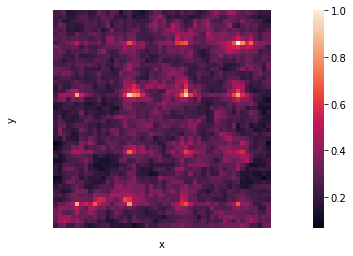

In [162]:
heatmap_data = np.zeros((model.grid.width, model.grid.height))
for coor in array_alive_positions:
    x,y = coor
    heatmap_data[x,y] +=1

most_frequent = np.amax(heatmap_data)
norm_heatmap_data = heatmap_data/most_frequent

ax = sns.heatmap(norm_heatmap_data)
ax.invert_yaxis()
plt.axis('equal')
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
plt.tick_params(left = False, bottom = False)
ax.set_xlabel('x')
ax.set_ylabel('y')



    